# Melanoma Tumor Size Prediction

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Training and Testing Data

In [512]:
train = pd.read_csv(r'C:\Users\Gaurav Kesari\Melanoma Tumor Size Prediction\train.csv')
print(train.shape)
train.head()

(9146, 10)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [513]:
test = pd.read_csv(r'C:\Users\Gaurav Kesari\Melanoma Tumor Size Prediction\test.csv')
print(test.shape)
test.head()

(36584, 9)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [514]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [515]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36584 entries, 0 to 36583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       36584 non-null  float64
 1   size_npear      36584 non-null  float64
 2   malign_ratio    36584 non-null  float64
 3   damage_size     36584 non-null  float64
 4   exposed_area    36584 non-null  float64
 5   std_dev_malign  36584 non-null  float64
 6   err_malign      36584 non-null  float64
 7   malign_penalty  36584 non-null  int64  
 8   damage_ratio    36584 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.5 MB


In [516]:
train.nunique()

mass_npea         8847
size_npear        8859
malign_ratio      7386
damage_size       8861
exposed_area      8949
std_dev_malign    8802
err_malign        8831
malign_penalty     315
damage_ratio      8641
tumor_size        6511
dtype: int64

In [517]:
test.nunique()

mass_npea         32718
size_npear        32694
malign_ratio      18248
damage_size       33065
exposed_area      34016
std_dev_malign    32186
err_malign        32380
malign_penalty      340
damage_ratio      30895
dtype: int64

In [518]:
# sns.pairplot(train)

In [519]:
train.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [520]:

# train['err_malign']=train['err_malign'].transform(np.log)




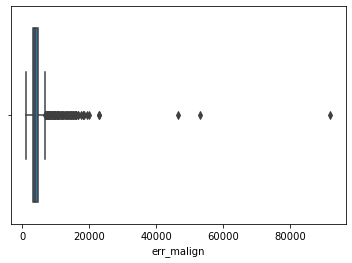

In [521]:
sns.boxplot(data=train, x= train['err_malign'])

1486.8949999999995
-1283.0024999999987
9125.262499999997


count    9146.000000
mean     3944.820995
std      1165.739064
min      1089.190000
25%      3177.682500
50%      3846.320000
75%      4664.577500
max      9125.260000
Name: err_malign, dtype: float64

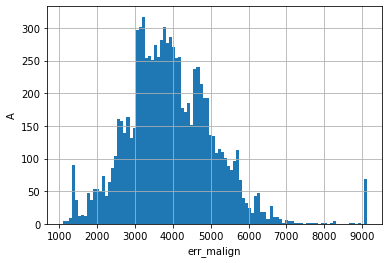

In [522]:
IQR = train['err_malign'].quantile(.75)-train['err_malign'].quantile(0.25)
lower_bridges = train['err_malign'].quantile(.25)-(IQR*3)
upper_bridges = train['err_malign'].quantile(.75)+(IQR*3)
print(IQR)
print(lower_bridges)
print(upper_bridges)
train.loc[train['err_malign']>=9125.26, 'err_malign']=9125.26

figure=train.err_malign.hist(bins=100)
figure.set_xlabel('err_malign')
figure.set_ylabel('A')
train['err_malign'].describe()

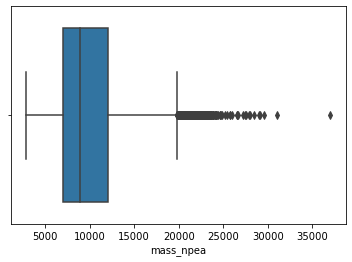

In [523]:
sns.boxplot(data=train, x= train['mass_npea'])

5131.529999999999
-8406.169999999996
27514.539999999994


count     9146.000000
mean      9900.892133
std       4049.686357
min       2864.760000
25%       6988.420000
50%       8895.965000
75%      12119.950000
max      27514.530000
Name: mass_npea, dtype: float64

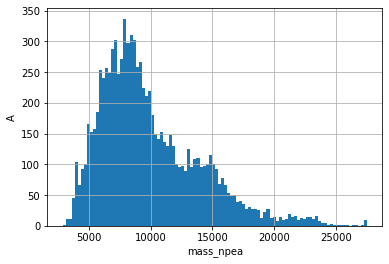

In [524]:
IQR = train['mass_npea'].quantile(.75)-train['mass_npea'].quantile(0.25)
lower_bridges = train['mass_npea'].quantile(.25)-(IQR*3)
upper_bridges = train['mass_npea'].quantile(.75)+(IQR*3)
print(IQR)
print(lower_bridges)
print(upper_bridges)
train.loc[train['mass_npea']>=27514.53, 'mass_npea']=27514.53

figure=train.mass_npea.hist(bins=100)
figure.set_xlabel('mass_npea')
figure.set_ylabel('A')
train['mass_npea'].describe()

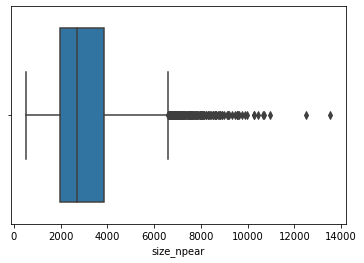

In [525]:
sns.boxplot(data=train, x= train['size_npear'])

1847.0874999999999
-3557.6049999999996
9372.0075


count    9146.000000
mean     3031.004582
std      1453.030850
min       510.530000
25%      1983.657500
50%      2684.330000
75%      3830.745000
max      9372.000000
Name: size_npear, dtype: float64

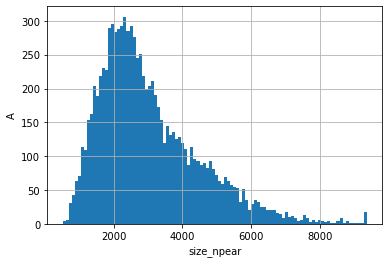

In [526]:
IQR = train['size_npear'].quantile(.75)-train['size_npear'].quantile(0.25)
lower_bridges = train['size_npear'].quantile(.25)-(IQR*3)
upper_bridges = train['size_npear'].quantile(.75)+(IQR*3)
print(IQR)
print(lower_bridges)
print(upper_bridges)
train.loc[train['size_npear']>=9372, 'size_npear']=9372

figure=train.size_npear.hist(bins=100)
figure.set_xlabel('size_npear')
figure.set_ylabel('A')
train['size_npear'].describe()

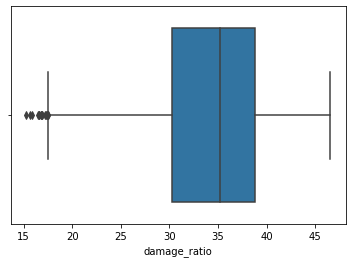

In [527]:
sns.boxplot(data=train, x= train['damage_ratio'])

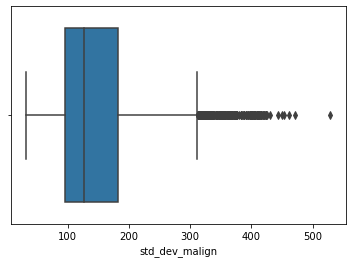

In [528]:
sns.boxplot(data=train, x= train['std_dev_malign'])

86.39760000000003
-163.33890000000008
441.4443000000001


count    9146.000000
mean      146.286978
std        70.432841
min        31.970400
25%        95.853900
50%       126.138500
75%       182.251500
max       441.444300
Name: std_dev_malign, dtype: float64

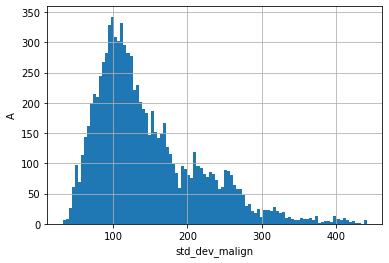

In [529]:
IQR = train['std_dev_malign'].quantile(.75)-train['std_dev_malign'].quantile(0.25)
lower_bridges = train['std_dev_malign'].quantile(.25)-(IQR*3)
upper_bridges = train['std_dev_malign'].quantile(.75)+(IQR*3)
print(IQR)
print(lower_bridges)
print(upper_bridges)
train.loc[train['std_dev_malign']>=441.4443000000001, 'std_dev_malign']=441.4443000000001

figure=train.std_dev_malign.hist(bins=100)
figure.set_xlabel('std_dev_malign')
figure.set_ylabel('A')
train['std_dev_malign'].describe()

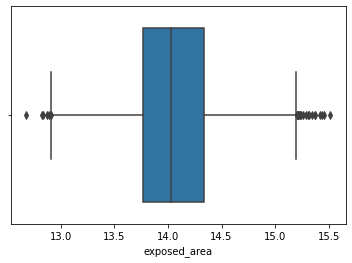

In [530]:

train['exposed_area']=train['exposed_area'].transform(np.log)
test['exposed_area']=test['exposed_area'].transform(np.log)
sns.boxplot(data=df, x= df['exposed_area'])

0.5676990821173931
12.071265495497308
16.04515907031906


count    9146.000000
mean       14.053139
std         0.395966
min        12.868383
25%        13.774363
50%        14.028246
75%        14.342062
max        15.420663
Name: exposed_area, dtype: float64

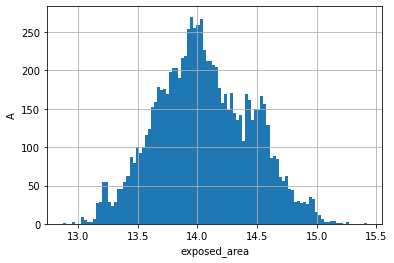

In [531]:
IQR = train['exposed_area'].quantile(.75)-train['exposed_area'].quantile(0.25)
lower_bridges = train['exposed_area'].quantile(.25)-(IQR*3)
upper_bridges = train['exposed_area'].quantile(.75)+(IQR*3)
print(IQR)
print(lower_bridges)
print(upper_bridges)
# train.loc[train['exposed_area']>=3893271.1864999994, 'exposed_area']=3893271.1864999994

figure=train.exposed_area.hist(bins=100)
figure.set_xlabel('exposed_area')
figure.set_ylabel('A')
train['exposed_area'].describe()

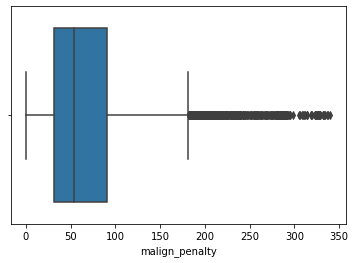

In [532]:
sns.boxplot(data=train, x= train['malign_penalty'])

60.0
-149.0
271.0


count    9146.000000
mean       69.545156
std        54.561067
min         0.000000
25%        31.000000
50%        54.000000
75%        91.000000
max       271.000000
Name: malign_penalty, dtype: float64

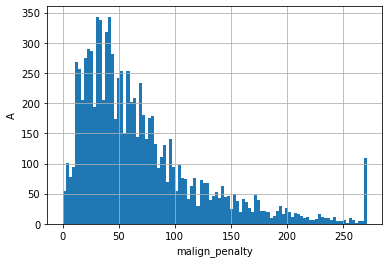

In [533]:
IQR = train['malign_penalty'].quantile(.75)-train['malign_penalty'].quantile(0.25)
lower_bridges = train['malign_penalty'].quantile(.25)-(IQR*3)
upper_bridges = train['malign_penalty'].quantile(.75)+(IQR*3)
print(IQR)
print(lower_bridges)
print(upper_bridges)
train.loc[train['malign_penalty']>=271, 'malign_penalty']=271

figure=train.malign_penalty.hist(bins=100)
figure.set_xlabel('malign_penalty')
figure.set_ylabel('A')
train['malign_penalty'].describe()

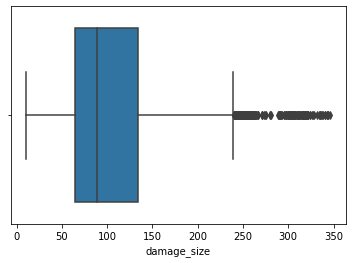

In [534]:
sns.boxplot(data=train, x= train['damage_size'])

70.196475
-146.57690000000002
344.798425


count    9146.000000
mean      103.901805
std        55.455502
min        10.310100
25%        64.012525
50%        88.458300
75%       134.209000
max       344.000000
Name: damage_size, dtype: float64

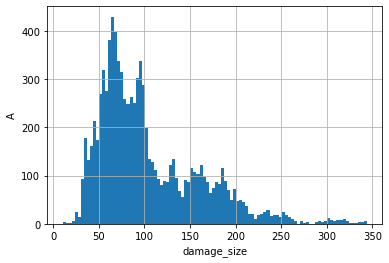

In [535]:
IQR = train['damage_size'].quantile(.75)-train['damage_size'].quantile(0.25)
lower_bridges = train['damage_size'].quantile(.25)-(IQR*3)
upper_bridges = train['damage_size'].quantile(.75)+(IQR*3)
print(IQR)
print(lower_bridges)
print(upper_bridges)
train.loc[train['damage_size']>=344, 'damage_size']=344

figure=train.damage_size.hist(bins=100)
figure.set_xlabel('damage_size')
figure.set_ylabel('A')
train['damage_size'].describe()

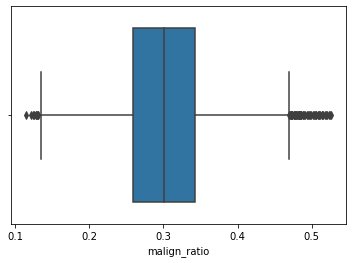

In [536]:
sns.boxplot(data=train, x= train['malign_ratio'])

In [537]:
# print(train['mass_npea'].shape)
train.columns

Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio', 'tumor_size'],
      dtype='object')

In [538]:
# overfit = []
# for i in train.columns:
#     counts = train[i].value_counts()
#     zeros = counts.iloc[0]
#     if zeros / len(train) * 100 > 99.94:
#         overfit.append(i)

# overfit = list(overfit)
# train = train.drop(overfit, axis=1)
# print(train.shape)

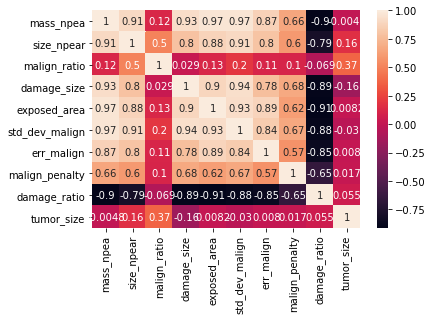

In [539]:
corelation = train.corr()

sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True) 

In [540]:
train.head(20)

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,13.804277,109.4870,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,14.537452,248.8810,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,14.176450,160.0930,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,14.410049,173.0150,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,13.858491,124.4140,3263.35,57,35.0200,18.023
5,6851.09,2195.18,0.32041,72.8283,13.762581,97.1881,3688.57,40,36.3481,1.709
6,7069.24,1886.09,0.26680,58.2686,13.839992,76.9447,3168.44,22,39.9961,9.937
7,16446.10,5115.45,0.31104,204.9740,14.589018,265.8810,6425.91,242,22.9533,2.510
8,6814.73,2043.78,0.29990,90.0889,13.781937,99.6286,3428.54,27,37.1642,12.568
9,5049.75,949.82,0.18809,41.2957,13.445349,70.4142,2734.59,27,41.1366,13.428


In [541]:
train.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9900.892133,3031.004582,0.303083,103.901805,14.053139,146.286978,3944.820995,69.545156,34.461652,7.723348
std,4049.686357,1453.030850,0.062533,55.455502,0.395966,70.432841,1165.739064,54.561067,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,12.868383,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,13.774363,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,14.028246,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,14.342062,182.251500,4664.577500,91.000000,38.806075,13.336000
max,27514.530000,9372.000000,0.525300,344.000000,15.420663,441.444300,9125.260000,271.000000,46.546400,20.999000


In [542]:
combine= [train, test]
for dataset in combine:
    dataset['mass_npea_band']=pd.qcut(dataset['mass_npea'],70)
    dataset['size_npear_band']=pd.qcut(dataset['size_npear'],70)
    dataset['malign_ratio_band']=pd.qcut(dataset['malign_ratio'],70)
    dataset['damage_size_band']=pd.qcut(dataset['damage_size'],70)
    dataset['exposed_area_band']=pd.qcut(dataset['exposed_area'],70)
    dataset['std_dev_malign_band']=pd.qcut(dataset['std_dev_malign'],70)
    dataset['err_malign_band']=pd.qcut(dataset['err_malign'],70)
#     dataset['malign_penalty_band']=pd.qcut(dataset['malign_penalty'],65)
    dataset['damage_ratio_band']=pd.qcut(dataset['damage_ratio'],70)

    
# print(train[['mass_npea_band','tumor_size']].groupby(['mass_npea_band'], as_index = False).mean().sort_values(by="tumor_size", ascending=True))


from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
for dataset in combine:
    dataset['mass_npea_band']=label.fit_transform(dataset['mass_npea_band'])
    dataset['size_npear_band']=label.fit_transform(dataset['size_npear_band'])
    dataset['malign_ratio_band']=label.fit_transform(dataset['malign_ratio_band'])
    dataset['damage_size_band']=label.fit_transform(dataset['damage_size_band'])
    dataset['exposed_area_band']=label.fit_transform(dataset['exposed_area_band'])
    dataset['std_dev_malign_band']=label.fit_transform(dataset['std_dev_malign_band'])
    dataset['err_malign_band']=label.fit_transform(dataset['err_malign_band'])
#     dataset['malign_penalty_band']=label.fit_transform(dataset['malign_penalty_band'])
    dataset['damage_ratio_band']=label.fit_transform(dataset['damage_ratio_band'])
    
    
# for dataset in combine:
#      dataset.loc[(dataset['mass_npea']>7.775) & (dataset['mass_npea']<=8.662), 'mass_npea']=0
#     dataset.loc[dataset['mass_npea']<=7.775, 'mass_npea'] =1
#     dataset.loc[(dataset['mass_npea']>8.662) & (dataset['mass_npea']<=14.454), 'mass_npea']=2
#     dataset.loc[(dataset['mass_npea']>26.0) & (dataset['mass_npea']<=52.369), 'Fare']=3
#     dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=26.0), 'Fare']=4
#     dataset.loc[(dataset['Fare']>52.369) & (dataset['Fare']<=512.329), 'Fare']=5
#     dataset['Fare'] = dataset['Fare'].astype(int)

In [543]:
train = train.drop(["mass_npea",'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'damage_ratio'], axis=1)
test = test.drop(["mass_npea", 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'damage_ratio'], axis=1)


In [544]:
train.head()

,malign_penalty,tumor_size,mass_npea_band,size_npear_band,malign_ratio_band,damage_size_band,exposed_area_band,std_dev_malign_band,err_malign_band,damage_ratio_band
0,72,14.103,17,39,67,8,19,25,9,55
1,240,2.648,63,61,39,67,60,62,67,2
2,73,1.688,45,33,14,50,44,46,51,16
3,32,3.796,55,58,53,56,55,50,61,11
4,57,18.023,22,39,62,33,22,34,20,33


In [545]:
x = train.drop("tumor_size", axis=1)
y = train["tumor_size"]

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y =train_test_split(x, y, random_state=1)




In [546]:
# # from sklearn.linear_model import LogisticRegression
# # from sklearn import preprocessing

# # lab_enc = preprocessing.LabelEncoder()
# # y_encoded = lab_enc.fit_transform(y)

# from sklearn.linear_model import LinearRegression
# reg=LinearRegression()
# reg = reg.fit(x, y)
# predict_LR=reg.predict(test)

# r2_score=reg.score(x,y)
# print(r2_score)




In [547]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=350)
rf.fit(x,y)
predictions=rf.predict(test)
print(rf.score(x,y))

0.9429351418473733


In [548]:
# from sklearn.neighbors import KNeighborsRegressor

# knn=KNeighborsRegressor(n_neighbors=3)
# knn.fit(x, y)
# predictions =knn.predict(test)
# print(knn.score(x,y))


In [549]:
# from sklearn.svm import SVC

# from sklearn import preprocessing

# lab_enc = preprocessing.LabelEncoder()
# y_encoded = lab_enc.fit_transform(y)

# svc =SVC()
# svc.fit(x, y_encoded)
# predictions=svc.predict(test)
# print(svc.score(x,y_encoded))

In [550]:
# from sklearn.tree import DecisionTreeeRegressor

# dt = DecisionTreeRegressor()
# dt.fit(x, y)
# predictions = dt.predict(test)
# print(dt.score(x, y))

In [551]:
# from xgboost import XGBRegressor

# model_xgb = XGBRegressor(n_estimator=1000)
# model_xgb.fit(train_x, train_y, early_stopping_rounds=5, eval_set=[(val_x, val_y)], verbose=False)
# pred_val=model_xgb.predict(val_x)
# predictions=model_xgb.predict(test)

# acc_xgb =round (model_xgb.score(x,y)*100, 2)
# print('Score :',  acc_xgb)
# mse= mean_squared_error(pred_val, val_y)
# print('Mean Squared Error :', mse)
# print(model_xgb.score(x,y))

In [552]:

output=pd.DataFrame({'tumor_size':predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfullly saved")


Your submission was successfullly saved


In [553]:
output

,tumor_size
0,6.187746
1,10.161271
2,2.792249
3,10.073031
4,11.854423
...,...
36579,2.788829
36580,15.612946
36581,3.659571
36582,10.521323
